# Housing Prices
A simple yet challenging project, to predict the housing price based on certain factors like house area, bedrooms, furnished, nearness to mainroad, etc. The dataset is small yet, it's complexity arises due to the fact that it has strong multicollinearity. Can you overcome these obstacles & build a decent predictive model?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
housing = pd.read_csv('../data/Housing.csv')
housing

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [4]:
housing['price'] = housing['price'] / 1000000
housing['area'] = housing['area'] / 1000

In [5]:
housing.rename(columns={
    'price':'price (in millions)',
    'area': 'area (in thousands sqft)'
}, inplace = True)

# Information about the Data
One can attain some insights by just looking at the data on its own but for some added context and insight here are the data definitions.
- price: Price of the houses
- area: Area of a House
- bedrooms: Number of House Bedrooms
- bathrooms: Number of bathrooms
- stories: Number of House Stories
- mainroad: Whether house is connected by mainroad
- guestroom: Whether the house has a guestroom
- basement: Whether the house has a basement
- hotwaterheating: Whether the house has hot water heating
- airconditioning: Whether the house has an airconditioning


<AxesSubplot: xlabel='price (in millions)', ylabel='Count'>

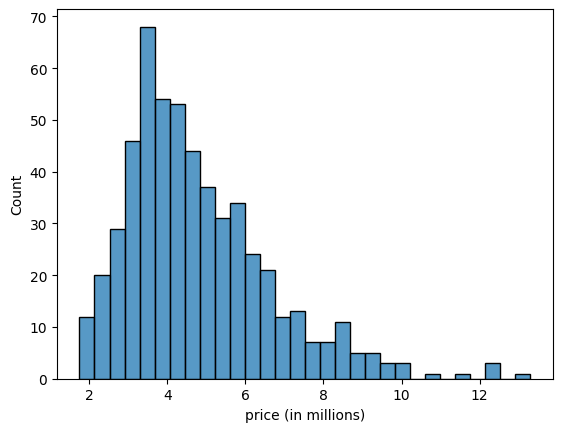

In [6]:
sns.histplot(housing, x='price (in millions)', bins=30)

<AxesSubplot: xlabel='stories', ylabel='Count'>

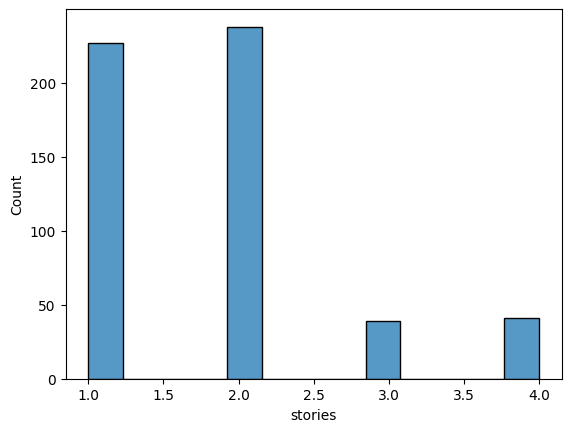

In [7]:
sns.histplot(housing, x='stories')

<AxesSubplot: xlabel='price (in millions)', ylabel='area (in thousands sqft)'>

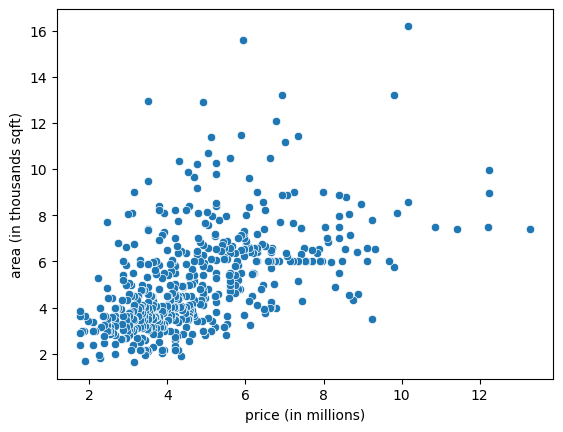

In [8]:
sns.scatterplot(housing, x='price (in millions)', y='area (in thousands sqft)')

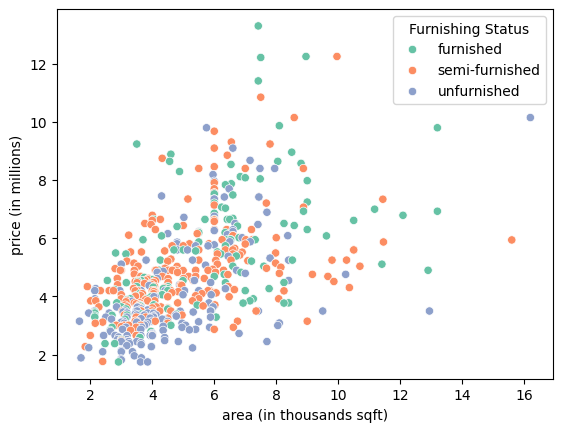

In [9]:
sns.scatterplot(housing, 
                x='area (in thousands sqft)', 
                y='price (in millions)',
                hue='furnishingstatus',
                palette='Set2'
                )
plt.legend(title='Furnishing Status')

In [10]:
custom_palette = {'yes': '#6699FF', 'no': '#FF6666'}

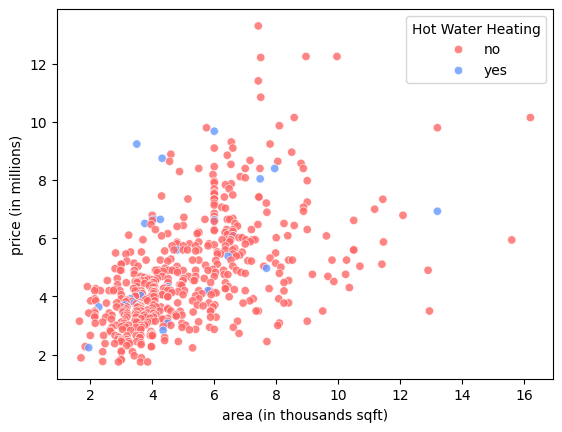

In [11]:
sns.scatterplot(housing, 
                x='area (in thousands sqft)', 
                y='price (in millions)',
                hue='hotwaterheating',
                palette=custom_palette,
                alpha=0.8
                )
plt.legend(title='Hot Water Heating')

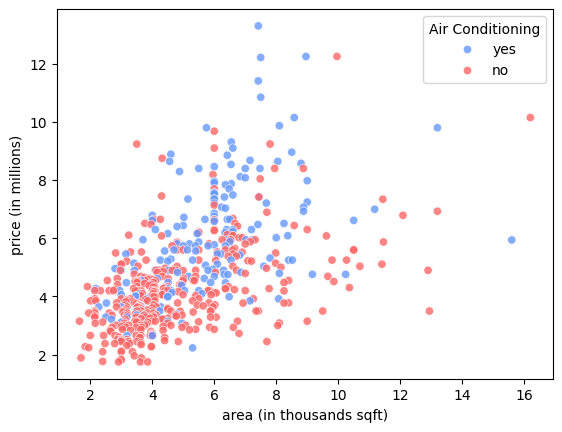

In [12]:
sns.scatterplot(housing, 
                x='area (in thousands sqft)', 
                y='price (in millions)',
                hue='airconditioning',
                palette=custom_palette,
                alpha=0.8
                )
plt.legend(title='Air Conditioning')

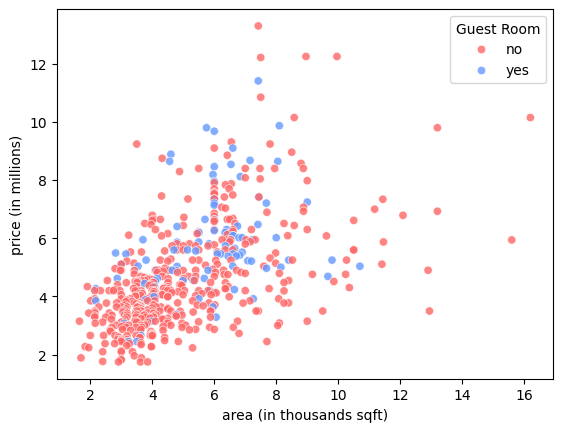

In [13]:
sns.scatterplot(housing, 
                x='area (in thousands sqft)', 
                y='price (in millions)',
                hue='guestroom',
                palette=custom_palette,
                alpha=0.8
                )
plt.legend(title='Guest Room')

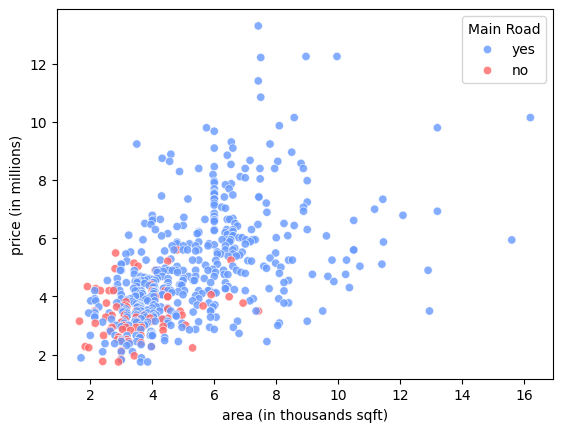

In [14]:
sns.scatterplot(housing, 
                x='area (in thousands sqft)', 
                y='price (in millions)',
                hue='mainroad',
                palette=custom_palette,
                alpha=0.8
                )
plt.legend(title='Main Road')

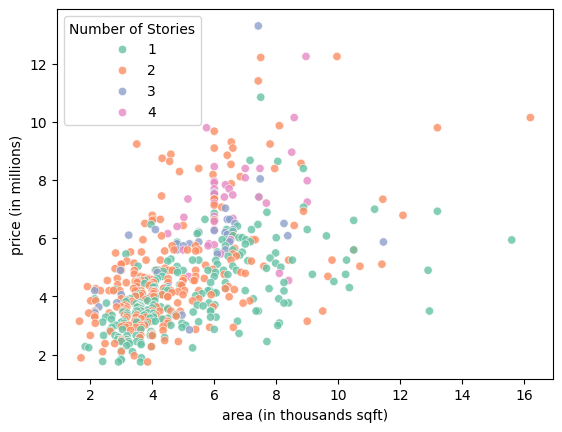

In [15]:
sns.scatterplot(housing, 
                x='area (in thousands sqft)', 
                y='price (in millions)',
                hue='stories',
                palette='Set2',
                alpha=0.8
                )
plt.legend(title='Number of Stories')

<AxesSubplot: xlabel='stories', ylabel='price (in millions)'>

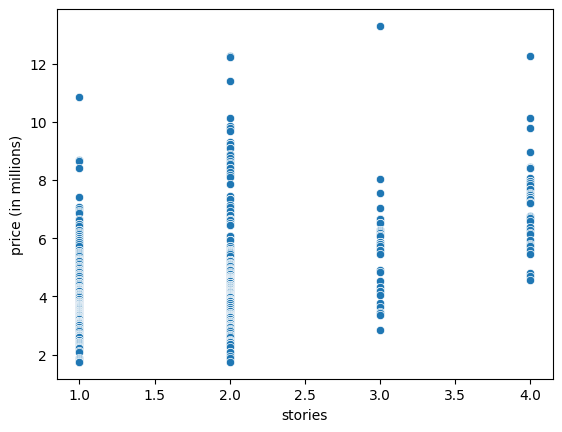

In [16]:
sns.scatterplot(housing, x='stories', y='price (in millions)')

<AxesSubplot: xlabel='bedrooms', ylabel='price (in millions)'>

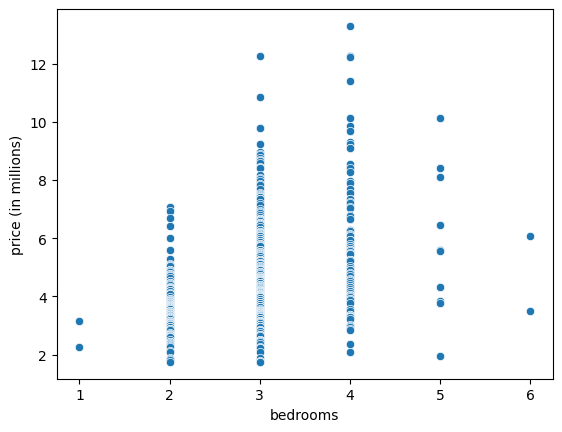

In [17]:
sns.scatterplot(housing, x='bedrooms', y='price (in millions)')

<AxesSubplot: xlabel='bathrooms', ylabel='price (in millions)'>

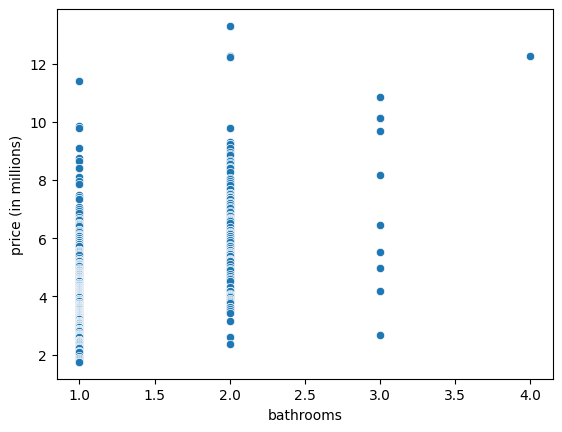

In [18]:
sns.scatterplot(housing, x='bathrooms', y='price (in millions)')

In [19]:
housing2 = housing

In [20]:
housing2['basement'] = housing2['basement'].map({'yes':1, 'no':0})

In [21]:
housing2['rooms'] = housing2['bedrooms'] + housing2['bathrooms'] + housing2['basement']
housing2['area (per room)'] = housing2['area (in thousands sqft)'] / housing2['rooms'] * 1000
housing2.head(5)

,price (in millions),area (in thousands sqft),bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,rooms,area (per room)
0,13.300,7.42,4,2,3,yes,no,0,no,yes,2,yes,furnished,6,1236.666667
1,12.250,8.96,4,4,4,yes,no,0,no,yes,3,no,furnished,8,1120.000000
2,12.250,9.96,3,2,2,yes,no,1,no,no,2,yes,semi-furnished,6,1660.000000
3,12.215,7.50,4,2,2,yes,no,1,no,yes,3,yes,furnished,7,1071.428571
4,11.410,7.42,4,1,2,yes,yes,1,no,yes,2,no,furnished,6,1236.666667


<AxesSubplot: xlabel='price (in millions)', ylabel='area (per room)'>

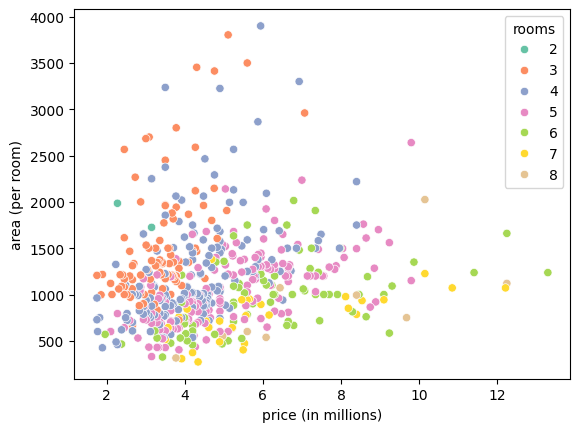

In [22]:
sns.scatterplot(housing2, 
                x='price (in millions)', 
                y='area (per room)',
                hue='rooms',
                palette='Set2'
)

In [23]:
housing2.to_csv('housing_eda.csv', index=False)